#  **1. ESTUDIO Y PREPARACIÓN DE DATOS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv("../data/all_womens_foil_bout_data_May_13_2021_cleaned.csv")
df2 = pd.read_csv("../data/all_womens_foil_fencer_bio_data_May_13_2021_cleaned.csv")
df3 = pd.read_csv("../data/all_womens_foil_fencer_rankings_data_May_13_2021_cleaned.csv")
df4 = pd.read_csv("../data/all_womens_foil_tournament_data_May_13_2021_cleaned.csv")

In [3]:
df2.isna().sum() # Único dataframe con nulos

id               0
name             0
country_code     0
country          0
hand             1
age              0
url              0
date_accessed    0
dtype: int64

In [4]:
df2.dropna(inplace=True) # Eliminamos fila con nulos

df_agrupado_ID = pd.read_csv("../data/df_id") # Cargamos el df agrupado de df1,df2 y df3 por la columna "id"

df4.drop(columns=["missing_results_flag"], inplace = True) # Eliminamos columna con todo valores únicos

# Para agrupar el df_agrupado_ID y el df4 lo hacemos a través de la columna del ID del torneo. En el df_agrupado_ID la columna tiene nombre distinto y lo cambiamos.
df_agrupado_ID.rename(columns={'tournament_ID': 'competition_ID'}, inplace=True)

# Agrupamos por columna "competicion_ID"
df_agrupado_ID['competition_ID_numeric'] = df_agrupado_ID['competition_ID'].str.split('-').str[1]

df_agrupado_ID['competition_ID_numeric'] = pd.to_numeric(df_agrupado_ID['competition_ID_numeric'])
df4['competition_ID'] = pd.to_numeric(df4['competition_ID'])

df_juntado = pd.merge(df_agrupado_ID, df4, left_on='competition_ID_numeric', right_on='competition_ID', how='inner')

df_juntado.drop(columns=['competition_ID_numeric'], inplace=True)

df_juntado.drop(columns=["weapon_x", "weapon_y", "gender"], inplace = True) # Dado que se analiza la modalidad de florete femenino, las columnas de tipo de arma y género son prescindibles



In [5]:
# Calcular el número de victorias por competidora (contador de 'winner_ID')
victorias = df_juntado['winner_ID'].value_counts().reset_index()

# Renombramos las columnas del DataFrame de victorias
victorias.columns = ['winner_ID', 'num_victorias']

# Unir el DataFrame de victorias con el DataFrame original
df_final = df_juntado.merge(victorias, on='winner_ID', how='left')

In [6]:
df_final.to_csv('../data/df_final.csv', index=False, header= True) # Guardamos el df final

#  **2. TABLA DE VARIABLES: definiciones, tipificación y priorización.**

In [7]:

# Creamos una lista de diccionarios cuyas keys son: "Variable", "Definición", "Tipo de Variable", "Prioridad", "Comentario"

variables_lista = [
    {"Variable": "id", "Definición": "Identificador único de la competidora.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Alta", "Comentario": "Es clave para identificar a la floretista."},
    {"Variable": "opp_ID", "Definición": "Identificador único de la oponente.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Alta", "Comentario": "También importante para identificar a la oponente."},
    {"Variable": "fencer_age", "Definición": "Edad de la competidora.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Puede influir en el rendimiento de la competidora."},
    {"Variable": "opp_age", "Definición": "Edad de la oponente.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Importante para ver si la edad afecta el rendimiento."},
    {"Variable": "fencer_score", "Definición": "Puntuación de la competidora en el duelo.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Clave para comparar el rendimiento entre competidoras."},
    {"Variable": "opp_score", "Definición": "Puntuación de la oponente en el duelo.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Similar a fencer_score, para comparar los resultados entre ambas competidoras."},
    {"Variable": "winner_ID", "Definición": "Identificador de la competidora ganadora (igual a id si la competidora gana).", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Alta", "Comentario": "Importante para determinar la ganadora."},
    {"Variable": "fencer_curr_pts", "Definición": "Puntos acumulados actuales de la competidora.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Importante para analizar si más puntos acumulados se relacionan con más victorias."},
    {"Variable": "opp_curr_pts", "Definición": "Puntos acumulados actuales de la oponente.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Similar a fencer_curr_pts, para comparar el rendimiento en base a puntos."},
    {"Variable": "competition_ID_x", "Definición": "Identificador único de la competición de la competidora.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Media", "Comentario": "Relacionado con el rendimiento de la competidora en cada competición."},
    {"Variable": "competition_ID_y", "Definición": "Identificador único de la competición de la oponente.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Media", "Comentario": "Similar al anterior, se puede usar para comparaciones entre competidoras."},
    {"Variable": "pool_ID", "Definición": "Identificador de la piscina o grupo en que compiten las competidoras.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Baja", "Comentario": "Relacionada con la fase de la competición, pero no directamente relevante para el análisis principal."},
    {"Variable": "upset", "Definición": "Variable binaria que indica si hubo un 'upset' (sorpresa) en la competición.", "Tipo de Variable": "Categórica (Binaria)", "Prioridad": "Alta", "Comentario": "Puede ser interesante para ver si la competidora con más puntos se enfrenta a 'upsets'."},
    {"Variable": "date", "Definición": "Fecha de la competición.", "Tipo de Variable": "Fecha", "Prioridad": "Media", "Comentario": "Útil para analizar tendencias a lo largo del tiempo."},
    {"Variable": "country_code", "Definición": "Código del país de la competidora.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Media", "Comentario": "Útil para análisis por país, aunque no es la principal variable de interés."},
    {"Variable": "country_x", "Definición": "Nombre del país de la competidora.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Media", "Comentario": "Similar a country_code, pero con más detalle."},
    {"Variable": "hand", "Definición": "Mano dominante de la competidora (derecha o izquierda).", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Baja", "Comentario": "Puede influir en el rendimiento, pero no es crucial en el análisis general."},
    {"Variable": "age", "Definición": "Edad de la competidora.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Relacionado con el rendimiento y las diferencias entre competidoras, como la edad de las juniors vs seniors."},
    {"Variable": "category_x", "Definición": "Categoría de la competidora (Junior, Senior, etc.).", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Alta", "Comentario": "Fundamental para ver si las categorías afectan los resultados."},
    {"Variable": "category_y", "Definición": "Categoría de la oponente.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Media", "Comentario": "Similar a category_x, para comparar entre competidoras."},
    {"Variable": "season_x", "Definición": "Temporada de la competidora.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Media", "Comentario": "Puede ser relevante para ver cómo cambian los resultados con el tiempo."},
    {"Variable": "season_y", "Definición": "Temporada de la oponente.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Media", "Comentario": "Similar a season_x, comparaciones entre competidoras."},
    {"Variable": "rank", "Definición": "Clasificación de la competidora.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Muy relevante para tu análisis, pues se puede relacionar con el rendimiento."},
    {"Variable": "points", "Definición": "Puntos obtenidos por la competidora en la competición.", "Tipo de Variable": "Numérica", "Prioridad": "Alta", "Comentario": "Es la variable clave en tu hipótesis, relacionada con el rendimiento."},
    {"Variable": "start_date", "Definición": "Fecha de inicio de la competición.", "Tipo de Variable": "Fecha", "Prioridad": "Media", "Comentario": "Importante para ver cómo cambian los puntos y resultados en función del tiempo."},
    {"Variable": "end_date", "Definición": "Fecha de fin de la competición.", "Tipo de Variable": "Fecha", "Prioridad": "Media", "Comentario": "Similar a start_date, relevante para analizar la duración y el efecto de las competiciones."},
    {"Variable": "timezone", "Definición": "Zona horaria de la competición.", "Tipo de Variable": "Categórica (Categoría)", "Prioridad": "Baja", "Comentario": "Relativamente irrelevante para el análisis, pero puede ser útil si comparas competiciones en diferentes zonas."},
    {"Variable": "url_x", "Definición": "URL de la competidora.", "Tipo de Variable": "Categórica (URL)", "Prioridad": "Baja", "Comentario": "Irrelevante para el análisis, más bien útil como referencia."},
    {"Variable": "url_y", "Definición": "URL de la oponente.", "Tipo de Variable": "Categórica (URL)", "Prioridad": "Baja", "Comentario": "Similar a url_x, no afecta el análisis."},
    {"Variable": "unique_ID", "Definición": "Identificador único de la competidora para cada entrada.", "Tipo de Variable": "Categórica (ID)", "Prioridad": "Alta", "Comentario": "Similar a id, clave para realizar un seguimiento de las competidoras."}
]
# Creamos y guardamos el DF
df_variables = pd.DataFrame(variables_lista)
df_variables.to_csv('../data/tabla_variables.csv', index=False)


#  **3. ANÁLISIS UNIVARIANTE.**

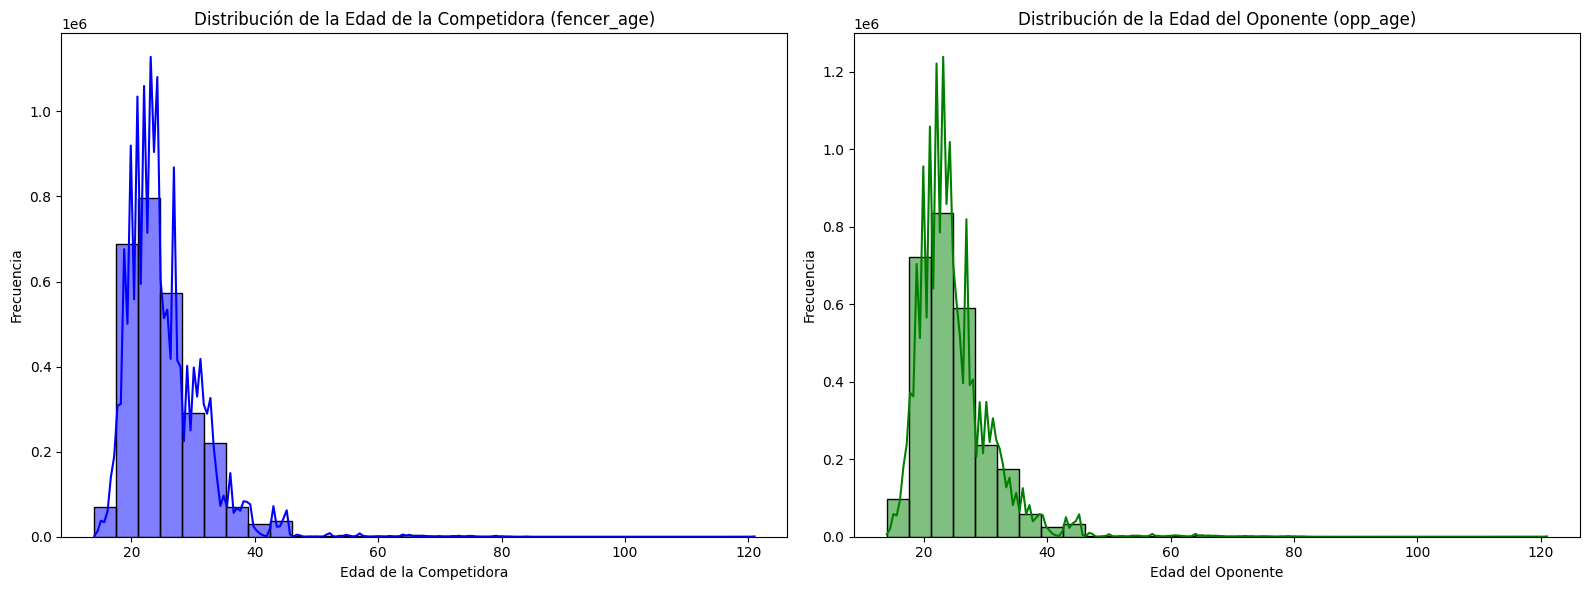

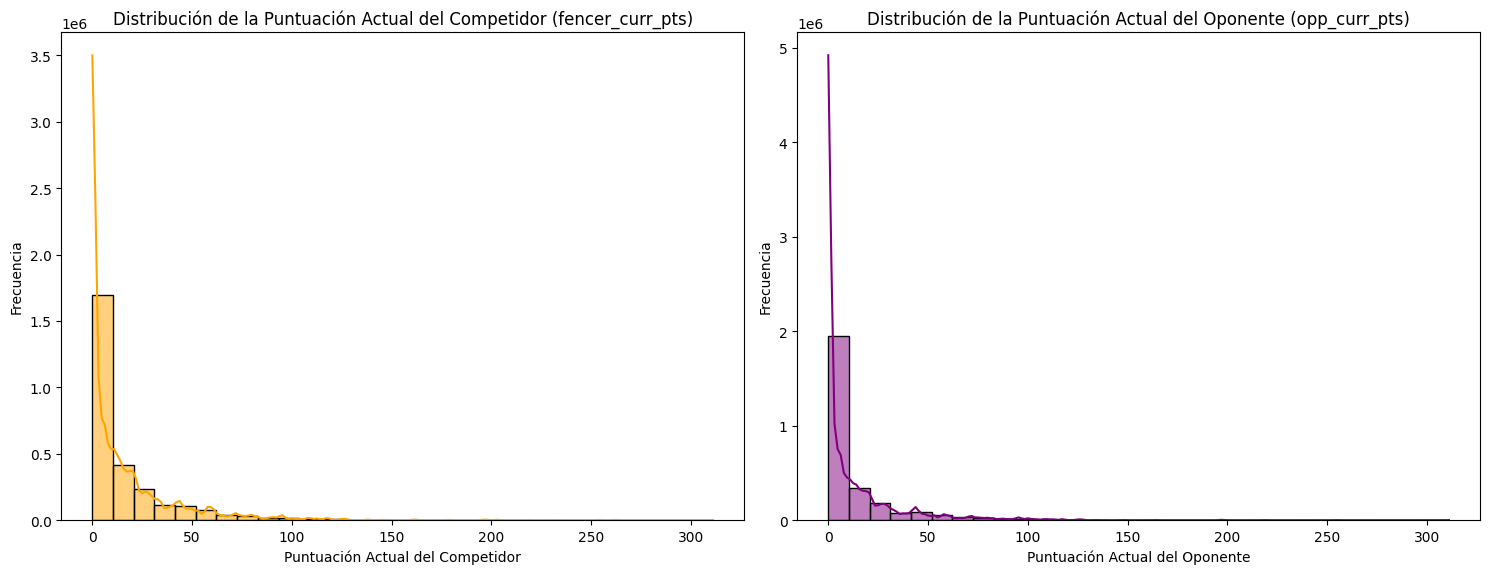

In [8]:
# 1. Gráficos comparación edades de competidoras y oponentes

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

   # Distribución de la edad de la competidora (fencer_age)
sns.histplot(df_final['fencer_age'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribución de la Edad de la Competidora (fencer_age)')
axes[0].set_xlabel('Edad de la Competidora')
axes[0].set_ylabel('Frecuencia')

    # Distribución de la edad del oponente (opp_age)
sns.histplot(df_final['opp_age'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribución de la Edad del Oponente (opp_age)')
axes[1].set_xlabel('Edad del Oponente')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# 2. Gráfico comparación puntuaciones actuales 

plt.figure(figsize=(15, 6))

    # Distribución de la puntuación actual del competidor (fencer_curr_pts)
plt.subplot(1, 2, 1)  # (filas, columnas, índice)
sns.histplot(df_final['fencer_curr_pts'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Puntuación Actual del Competidor (fencer_curr_pts)')
plt.xlabel('Puntuación Actual del Competidor')
plt.ylabel('Frecuencia')

    #Distribución de la puntuación actual del oponente (opp_curr_pts)
plt.subplot(1, 2, 2)
sns.histplot(df_final['opp_curr_pts'], bins=30, kde=True, color='purple')
plt.title('Distribución de la Puntuación Actual del Oponente (opp_curr_pts)')
plt.xlabel('Puntuación Actual del Oponente')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



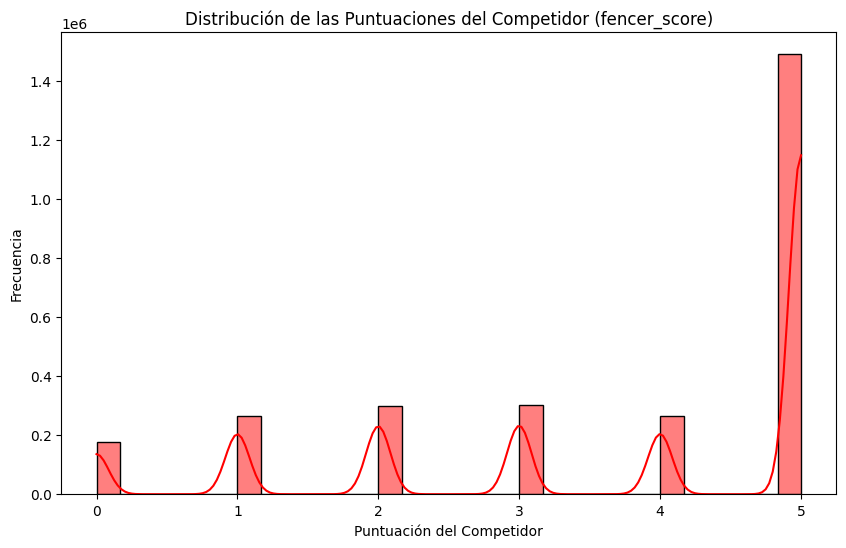

In [9]:
# Gráfico puntuación de la competidora 
plt.figure(figsize=(10, 6))
sns.histplot(df_final['fencer_score'], bins=30, kde=True, color='red')
plt.title('Distribución de las Puntuaciones del Competidor (fencer_score)')
plt.xlabel('Puntuación del Competidor')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\1953744020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='upset', data=df_final, palette='viridis')


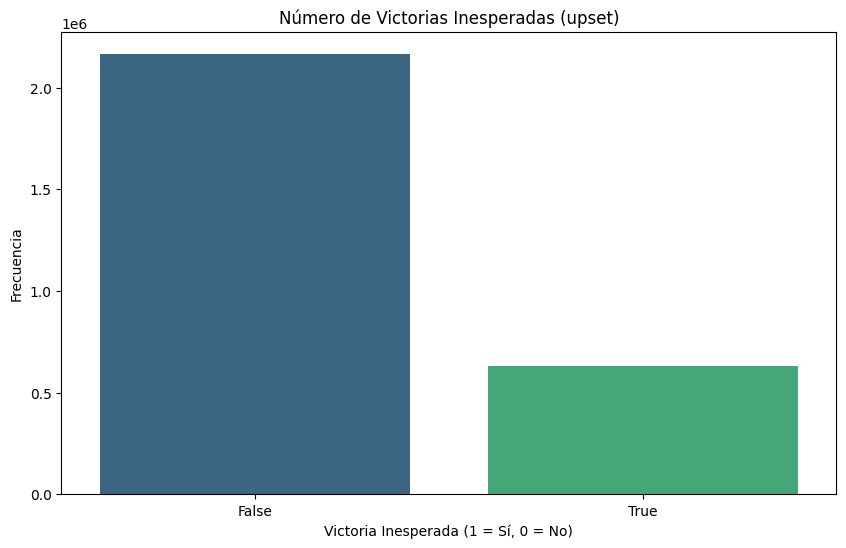

In [10]:
# Gráfico vicotrias inesperadas

plt.figure(figsize=(10, 6))
sns.countplot(x='upset', data=df_final, palette='viridis')
plt.title('Número de Victorias Inesperadas (upset)')
plt.xlabel('Victoria Inesperada (1 = Sí, 0 = No)')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Función para sacar estadíticos y conocer datos para la compresión y análisis
def estadísticas(df, columna):
    stats_df = df[columna].describe()
    mean = df[columna].mean()
    median = df[columna].median()
    mode = df[columna].mode()[0]
    std_dev = df[columna].std()
   
    # Rango
    data_range = df[columna].max() - df[columna].min()
    
    # Cuartiles y percentiles
    percentiles = np.percentile(df[columna], [25, 50, 75])
    
    result = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev,
        'Range': data_range,
        '25th Percentile': percentiles[0],
        '50th Percentile (Median)': percentiles[1],
        '75th Percentile': percentiles[2],
    }
    
    return result

variables = ['fencer_score', 'fencer_age', 'opp_age']

# Función aplicada a variables
resumen_fencer_score = estadísticas(df_final, 'fencer_score')
resumen_fencer_age = estadísticas(df_final, 'fencer_age')
resumen_opp_age = estadísticas(df_final, 'opp_age')

print("Resumen de estadísticas para 'fencer_score':")
print(resumen_fencer_score)

print("\nResumen de estadísticas para 'fencer_age':")
print(resumen_fencer_age)

print("\nResumen de estadísticas para 'opp_age':")
print(resumen_opp_age)

# Análisis variable 'upset' (categórica)
upset_counts = df_final['upset'].value_counts()
upset_percentage = df_final['upset'].value_counts(normalize=True) * 100

print("\nConteo de victorias inesperadas ('upset'):")
print(upset_counts)

print("\nPorcentaje de victorias inesperadas ('upset'):")
print(upset_percentage)

Resumen de estadísticas para 'fencer_score':
{'Mean': np.float64(3.6759285701504822), 'Median': np.float64(5.0), 'Mode': np.int64(5), 'Standard Deviation': np.float64(1.6802037728337555), 'Range': np.int64(5), '25th Percentile': np.float64(2.0), '50th Percentile (Median)': np.float64(5.0), '75th Percentile': np.float64(5.0)}

Resumen de estadísticas para 'fencer_age':
{'Mean': np.float64(25.32654356111439), 'Median': np.float64(24.0), 'Mode': np.int64(24), 'Standard Deviation': np.float64(6.118518666327141), 'Range': np.int64(107), '25th Percentile': np.float64(21.0), '50th Percentile (Median)': np.float64(24.0), '75th Percentile': np.float64(28.0)}

Resumen de estadísticas para 'opp_age':
{'Mean': np.float64(24.81669654839229), 'Median': np.float64(24.0), 'Mode': np.int64(23), 'Standard Deviation': np.float64(6.06979771546369), 'Range': np.int64(107), '25th Percentile': np.float64(21.0), '50th Percentile (Median)': np.float64(24.0), '75th Percentile': np.float64(27.0)}

Conteo de vict

#  **2. ANÁLISIS BIVARIANTE.**

## Edad competidora - Puntuación competidora (numéricas)

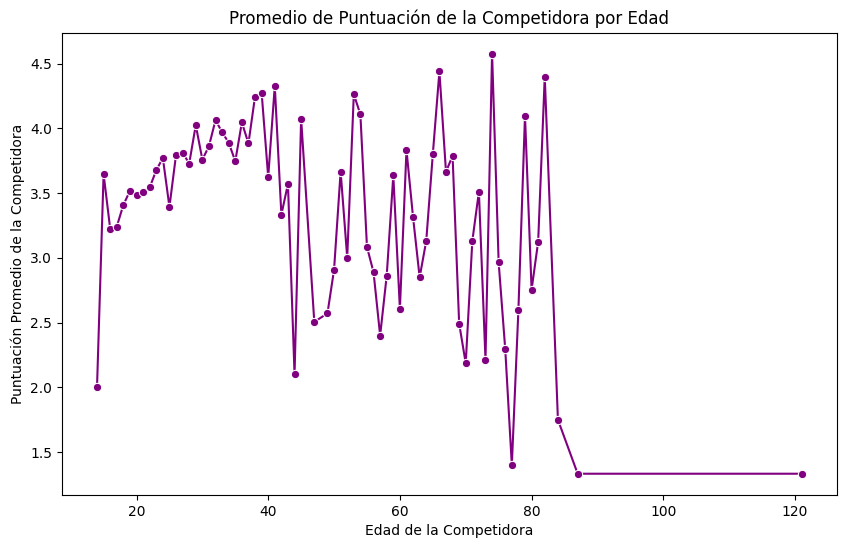

C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\1112242289.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')


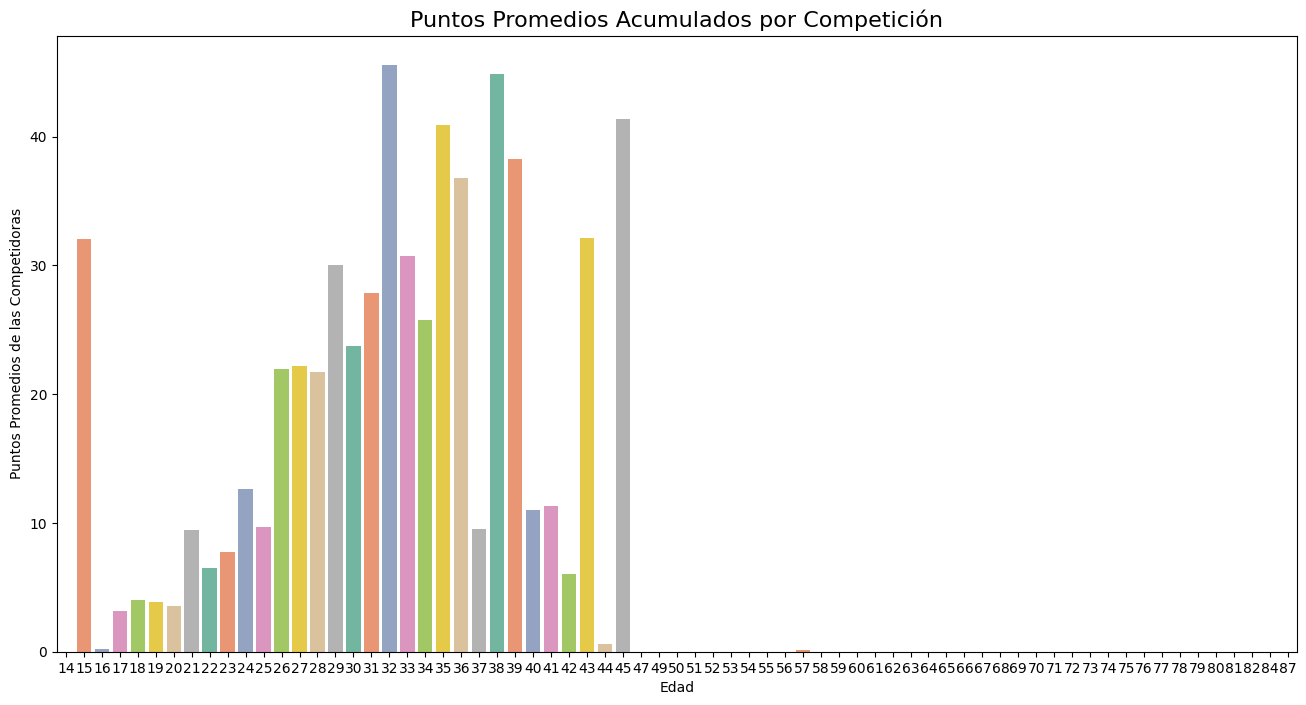

In [12]:

# Calcular la puntuación promedio por grupo de edad
age_avg_score = df_final.groupby('fencer_age')['fencer_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='fencer_age', y='fencer_score', data=age_avg_score, marker='o', color='purple')
plt.title('Promedio de Puntuación de la Competidora por Edad')
plt.xlabel('Edad de la Competidora')
plt.ylabel('Puntuación Promedio de la Competidora')
plt.show()

# Otro gráfico
average_points = df_final.groupby('age')['fencer_curr_pts'].mean().sort_values()

plt.figure(figsize=(16, 8))
sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')

plt.title('Puntos Promedios Acumulados por Competición', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Puntos Promedios de las Competidoras')

plt.show()


In [13]:
# Correlación de Pearson entre variables numéricas
correlation_age_score = df_final['fencer_age'].corr(df_final['fencer_score'])
print(f"Correlación entre Edad del Competidor y Puntuación del Competidor: {correlation_age_score}")



Correlación entre Edad del Competidor y Puntuación del Competidor: 0.06829641015871074


## Edad oponente - Puntuación actual (numéricas)


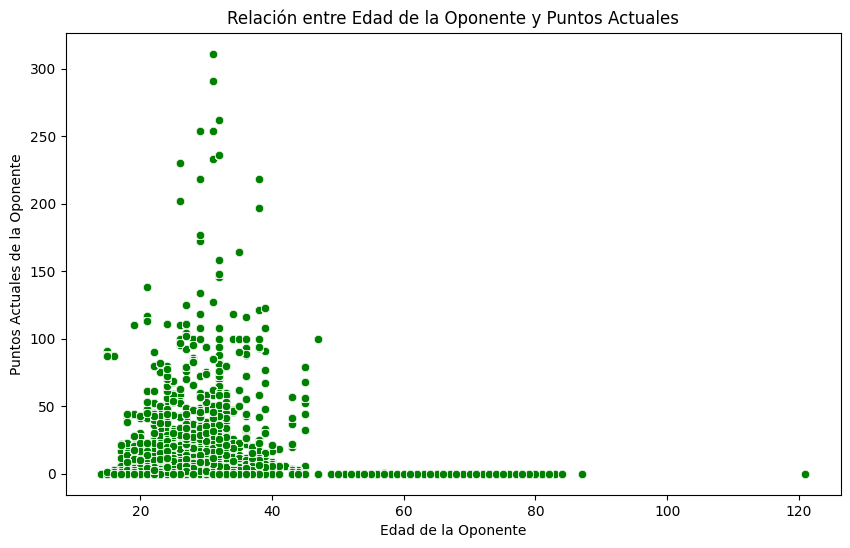

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='opp_age', y='opp_curr_pts', data=df_final, color='green')
plt.title('Relación entre Edad de la Oponente y Puntos Actuales')
plt.xlabel('Edad de la Oponente')
plt.ylabel('Puntos Actuales de la Oponente')
plt.show()



In [15]:
# Correlación de Pearson
correlation_opp_age_pts = df_final['opp_age'].corr(df_final['opp_curr_pts'])
print(f"Correlación entre Edad de la Oponente y Puntos Actuales: {correlation_opp_age_pts:.2f}")



Correlación entre Edad de la Oponente y Puntos Actuales: 0.27


## Puntuación actual - Victoria Inesperada (numérica-categórica)

C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\515923816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')


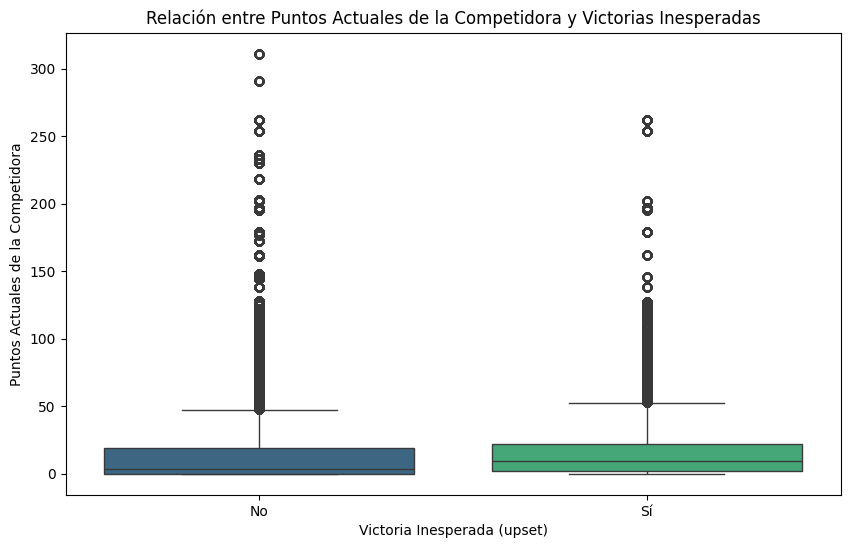

In [16]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')
plt.title('Relación entre Puntos Actuales de la Competidora y Victorias Inesperadas')
plt.xlabel('Victoria Inesperada (upset)')
plt.ylabel('Puntos Actuales de la Competidora')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()



In [17]:
# Prueba U de Mann_Whitney entre variables numéricas-categóricas

from scipy.stats import mannwhitneyu

group_no_upset = df_final[df_final['upset'] == 0]['fencer_curr_pts']
group_yes_upset = df_final[df_final['upset'] == 1]['fencer_curr_pts']

stat, p_value = mannwhitneyu(group_no_upset, group_yes_upset)

print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Estadístico U: 534533060646.50
Valor p: 0.0000


#  **2. ANÁLISIS BIVARIANTE.**

## Edad competidora - Puntuación competidora (numéricas)

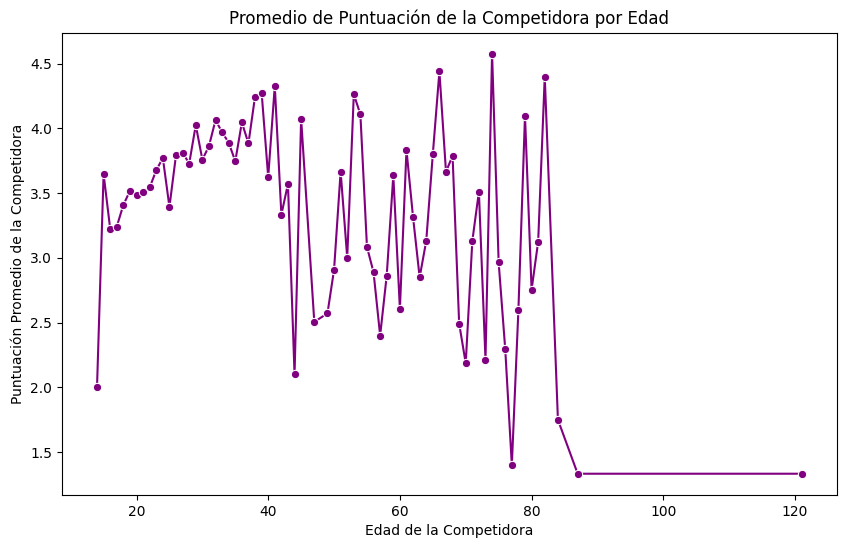

C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\1090782285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')


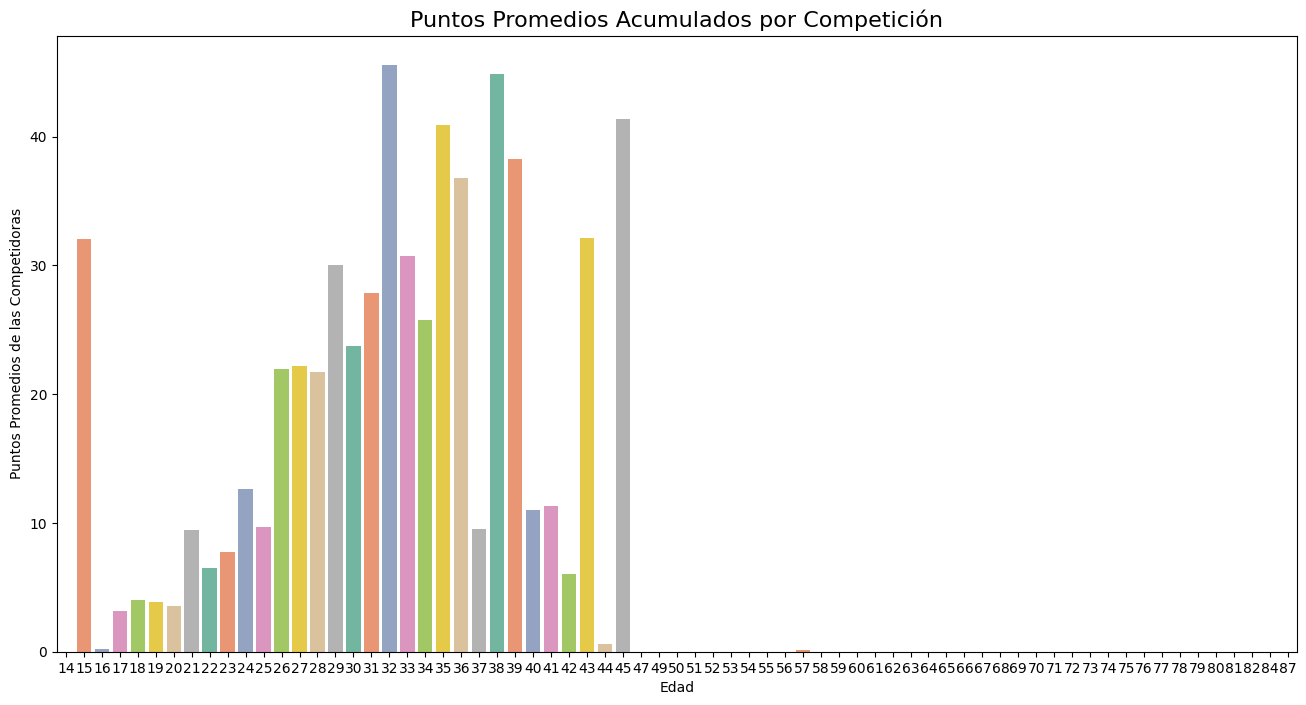

In [18]:
# Calcular la puntuación promedio por grupo de edad
age_avg_score = df_final.groupby('fencer_age')['fencer_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='fencer_age', y='fencer_score', data=age_avg_score, marker='o', color='purple')
plt.title('Promedio de Puntuación de la Competidora por Edad')
plt.xlabel('Edad de la Competidora')
plt.ylabel('Puntuación Promedio de la Competidora')
plt.show()

# Otro gráfico
average_points = df_final.groupby('age')['fencer_curr_pts'].mean().sort_values()

plt.figure(figsize=(16, 8))
sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')

plt.title('Puntos Promedios Acumulados por Competición', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Puntos Promedios de las Competidoras')

plt.show()

In [19]:
# Correlación de Pearson entre variables numéricas
correlation_age_score = df_final['fencer_age'].corr(df_final['fencer_score'])
print(f"Correlación entre Edad del Competidor y Puntuación del Competidor: {correlation_age_score}")


Correlación entre Edad del Competidor y Puntuación del Competidor: 0.06829641015871074


## Edad oponente - Puntuación actual (numéricas)

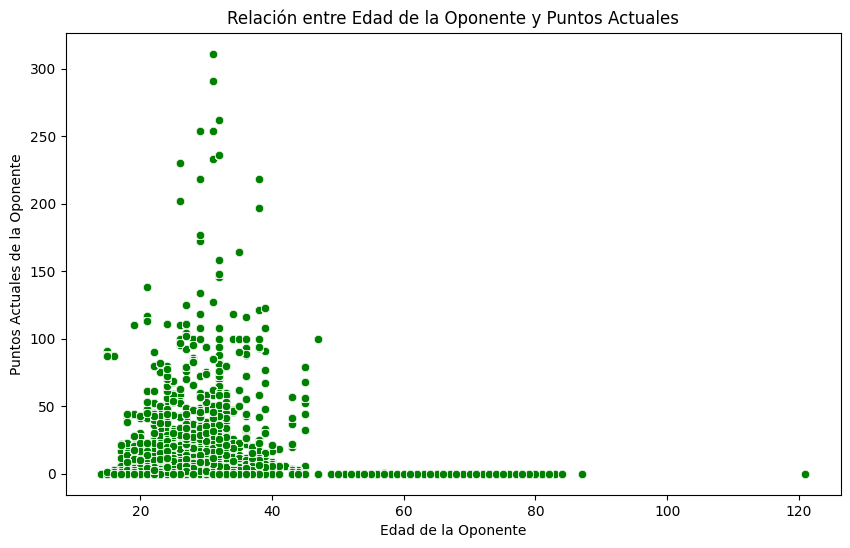

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='opp_age', y='opp_curr_pts', data=df_final, color='green')
plt.title('Relación entre Edad de la Oponente y Puntos Actuales')
plt.xlabel('Edad de la Oponente')
plt.ylabel('Puntos Actuales de la Oponente')
plt.show()


In [21]:
# Correlación de Pearson
correlation_opp_age_pts = df_final['opp_age'].corr(df_final['opp_curr_pts'])
print(f"Correlación entre Edad de la Oponente y Puntos Actuales: {correlation_opp_age_pts:.2f}")


Correlación entre Edad de la Oponente y Puntos Actuales: 0.27


## Puntuación actual - Victoria Inesperada (numérica-categórica)

C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\1922877835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')


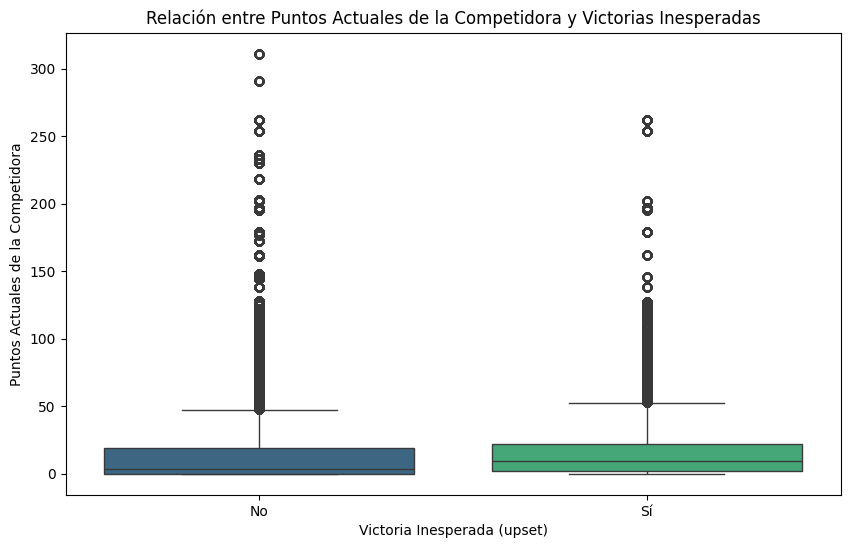

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')
plt.title('Relación entre Puntos Actuales de la Competidora y Victorias Inesperadas')
plt.xlabel('Victoria Inesperada (upset)')
plt.ylabel('Puntos Actuales de la Competidora')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


In [23]:
# Prueba U de Mann_Whitney entre variables numéricas-categóricas

from scipy.stats import mannwhitneyu

group_no_upset = df_final[df_final['upset'] == 0]['fencer_curr_pts']
group_yes_upset = df_final[df_final['upset'] == 1]['fencer_curr_pts']

stat, p_value = mannwhitneyu(group_no_upset, group_yes_upset)

print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Estadístico U: 534533060646.50
Valor p: 0.0000


## País de la competidora - Victoria (numérica-categórica)

C:\Users\iagog\AppData\Local\Temp\ipykernel_16124\3234111203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=victorias_por_pais.index, y=victorias_por_pais.values, palette='coolwarm')


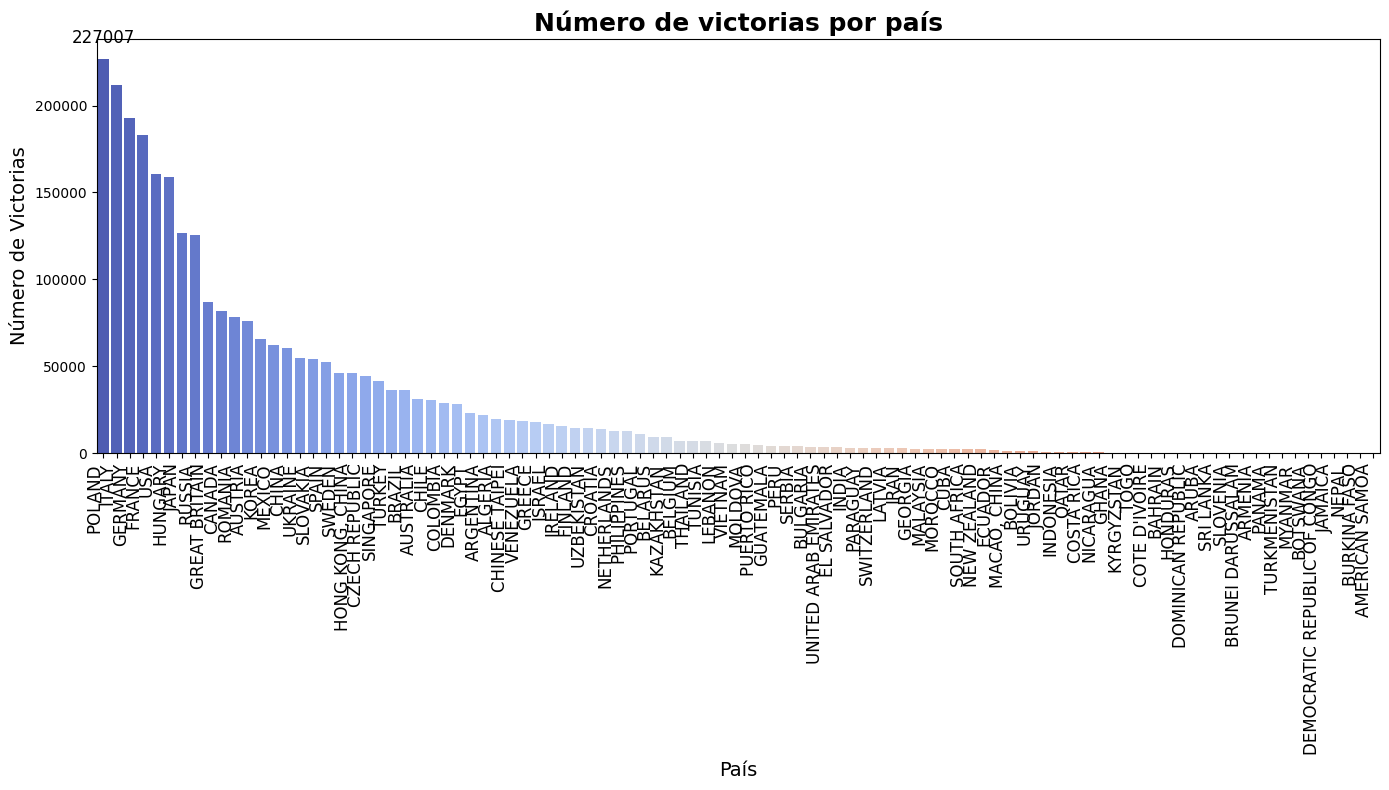

In [24]:
victorias_por_pais = df_final.groupby('country_x')['winner_ID'].count().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=victorias_por_pais.index, y=victorias_por_pais.values, palette='coolwarm')

plt.title('Número de victorias por país', fontsize=18, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Victorias', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotar las etiquetas del eje x para mejorar la legibilidad

ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=8)

plt.tight_layout()

plt.show()


#  **3. ANÁLISIS MULTIVARIANTE.**

In [25]:

# Función para obtener comparativa de gráficos

def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()

## Edad competidora - puntos actuales - victorias inesperadas

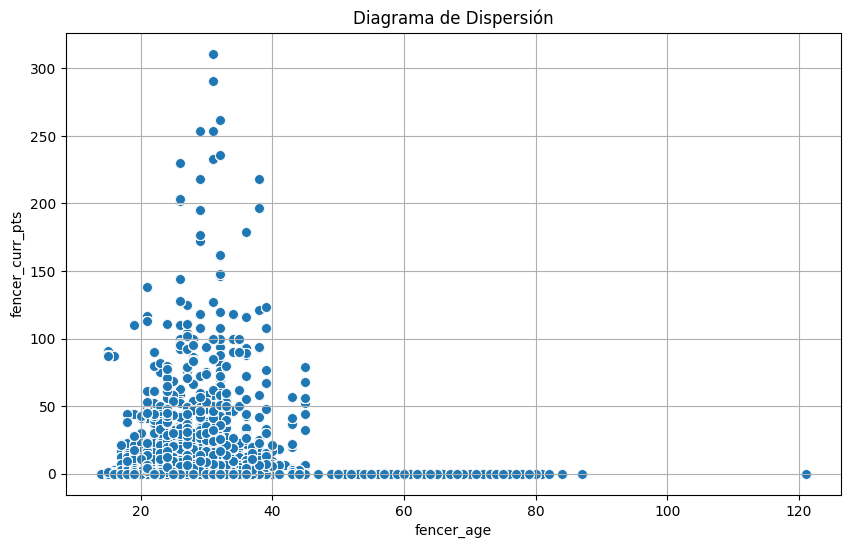

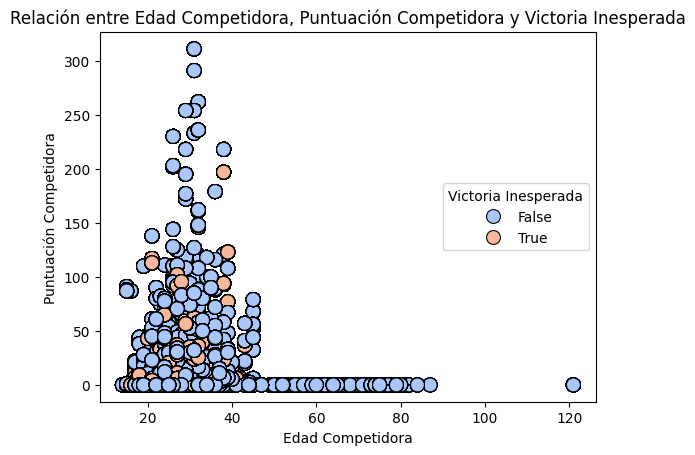

In [26]:
grafico_dispersion_con_correlacion(df_final, columna_x='fencer_age', columna_y='fencer_curr_pts', tamano_puntos=50, mostrar_correlacion=False)

# Añadimos el color basado en la columna 'upset'
sns.scatterplot(data=df_final, x='fencer_age', y='fencer_curr_pts', hue='upset', palette='coolwarm', s=100, edgecolor='black')

plt.title("Relación entre Edad Competidora, Puntuación Competidora y Victoria Inesperada")
plt.xlabel("Edad Competidora")
plt.ylabel("Puntuación Competidora")
plt.legend(title="Victoria Inesperada", loc='center right')
plt.show()

## País-puntos actuales - victorias inesperadas

c:\Users\iagog\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


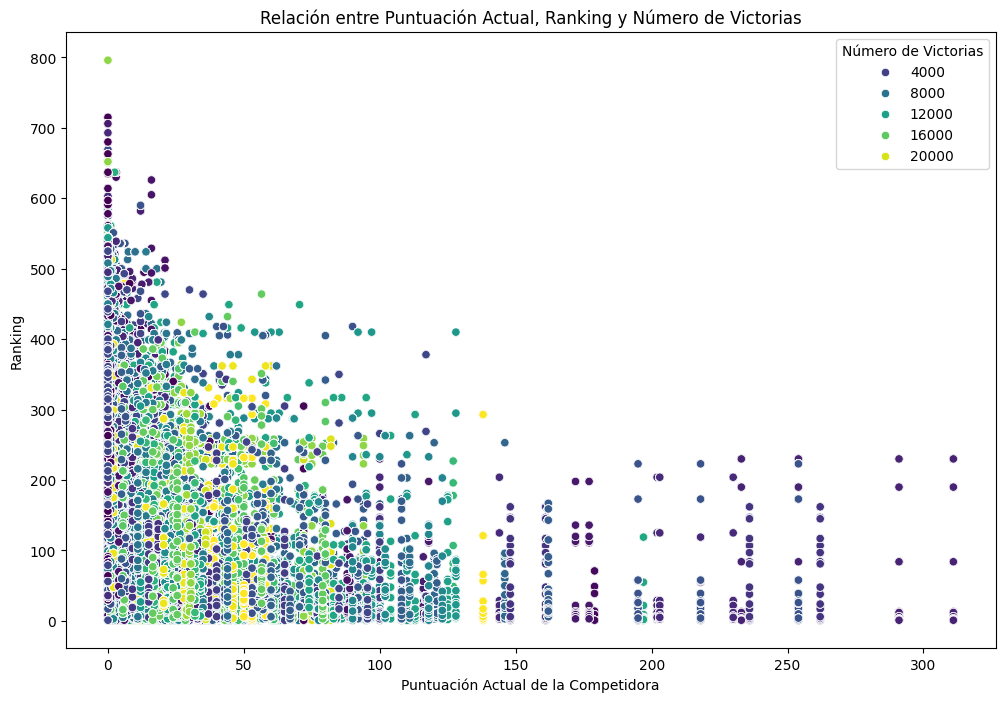

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_final, x='fencer_curr_pts', y='rank', hue='num_victorias', palette='viridis')
plt.title('Relación entre Puntuación Actual, Ranking y Número de Victorias')
plt.xlabel('Puntuación Actual de la Competidora')
plt.ylabel('Ranking')
plt.legend(title='Número de Victorias')
plt.show()


## Edad - puntos actuales - número de victorias 

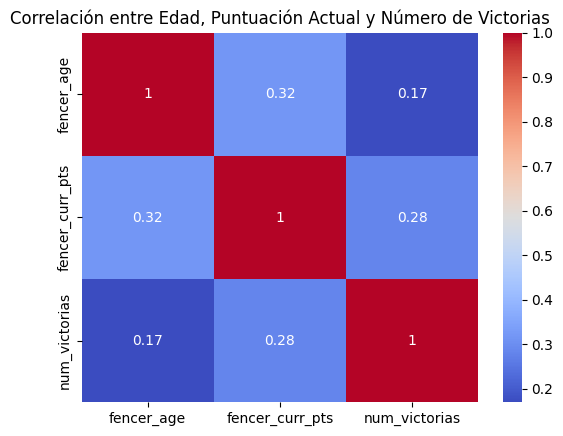

In [28]:
corr = df_final[['fencer_age', 'fencer_curr_pts', 'num_victorias']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre Edad, Puntuación Actual y Número de Victorias')
plt.show()